## Import stuff

### Libraries 

In [1]:
from __future__ import division
import string
import math
import nltk
import json
import unidecode
import numpy as np
import pandas as pd
import winsound
import pickle
import os
from nltk.corpus import stopwords
from scipy import stats
from text_clustering import text_preprocessing as tp
from collections import Counter

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()
import matplotlib.pylab as pylab

In [3]:
import topic_preprocessing as topic_pre

### Paths

In [4]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
all_files_path_jose = os.path.join(data_path,'textos_jose')
all_files_path_ulloa = os.path.join(data_path,'heber')
all_files_path_patricio = os.path.join(data_path,'textos_patricio')
all_files_path_others = os.path.join(data_path,'profes_varios_min_15m')

### Sessions and general data

#### Import sessions

In [5]:
all_documents_dict_jose = tp.read_documents(all_files_path_jose)
all_documents_dict_patricio = tp.read_documents(all_files_path_patricio)
all_documents_dict_ulloa = tp.read_documents(all_files_path_ulloa)
all_documents_dict_other = tp.read_documents(all_files_path_others)

In [6]:
all_jose = all_documents_dict_jose.values()
all_patricio = all_documents_dict_patricio.values()
all_ulloa = all_documents_dict_ulloa.values()
all_documents_other = all_documents_dict_other.values()

In [7]:
all_d = [all_jose,all_patricio,all_ulloa,all_documents_other]

In [8]:
sum(map(lambda x: len(x),all_d))

135

### Preprocess

#### Split

In [9]:
def splitted(a_list,n_lines):
    splitted_list = []
    for element in a_list:
        new_doc = []
        les_lines = element.splitlines()
        for i in range(len(les_lines)):
            if i%n_lines==0 and i>0:
                splitted_list.append("\n".join(new_doc))
                new_doc = []
            new_doc.append(les_lines[i])
        if new_doc != []:
            splitted_list.append("\n".join(new_doc))
    return splitted_list

In [10]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

In [11]:
splitted_jose = splitted(all_jose,1)
splitted_patricio = splitted(all_patricio,1)
splitted_ulloa = splitted(all_ulloa,1)
splitted_others = splitted(all_documents_other,1)
print(len(splitted_jose))
print(len(splitted_patricio))
print(len(splitted_ulloa))
print(len(splitted_others))

7736
6579
10581
4679


In [12]:
all_corpus = splitted_jose + splitted_patricio + \
            splitted_ulloa + splitted_others
all_corpus = [splitted_jose, splitted_patricio, \
            splitted_ulloa, splitted_others]

In [13]:
n_words = []
for x in all_corpus:
    for y in x:
        n_words.append(len(y.split()))

In [14]:
print(np.nanmean(n_words))
print(np.std(n_words))

20.471546914623836
13.913129597843142


#### Clean text (replace group of words, to lower, remove stop words, stemming)

In [480]:
clean_texts = []
for a_teacher_docs in all_corpus:
    for docs in a_teacher_docs:
        clean_texts.append(topic_pre.preprocessing(docs, withStemming = True))

#### Join unfrequent words

In [22]:
words = [word for t in clean_texts for word in t]
dict_with_fq = dict(Counter(words))

In [28]:
len(dict_with_fq)

15320

In [29]:
doc_clean = [['UNKNOWN' if dict_with_fq[w]<=1 else w for w in text] for text in clean_texts]

In [61]:
clean_texts = doc_clean

#### Preprocess (group if necessary)

In [62]:
with open('splitted_15s.pickle','wb') as f:
    pickle.dump(all_corpus,f)
    pickle.dump(clean_texts,f)

In [20]:
with open('splitted_15s.pickle','rb') as f:
    all_corpus = pickle.load(f)
    clean_texts = pickle.load(f)

In [7]:
print(len(clean_texts))

29575


In [474]:
clean_texts_pairs = []
for x, y in grouped(doc_clean, 2):
    aux = x + y
    clean_texts_pairs.append(aux)

In [8]:
print(np.mean([len(x) for x in doc_clean]))
print(np.std([len(x) for x in doc_clean]))

10.753068469991547
7.1143626448411394


#### Get descriptive information

In [109]:
a,b,c = topic_pre.minfo_pairs(clean_texts,topic_pre.createDictionary(clean_texts))

In [45]:
all_corpus_clean = []
for d in clean_texts:
    all_corpus_clean += d

In [46]:
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in all_corpus_clean:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

In [47]:
len(wordcount.keys())

15320

In [49]:
sum(wordcount.values())

318022

In [50]:
# Print most common word
n_print = 40
word_counter = Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print word + ": " + str(count)

NUMBER: 9781
YA_QUE: 8902
EN_CAMBIO: 4250
qué: 3741
más: 3656
TIENES_QUE: 3003
A_NAME: 2660
ADMINISTRACION: 2414
BIEN: 2039
fuerza: 2027
cómo: 1998
ver: 1923
TAMBIEN_TAMPOCO: 1865
sí: 1843
hacer: 1833
velocid: 1764
puede: 1741
ser: 1733
ahora: 1723
POR_EJEMPLO: 1708
acá: 1624
voy: 1579
agua: 1505
luz: 1476
AQUI_ALLA: 1448
ahí: 1415
tiempo: 1384
dos: 1344
pregunt: 1243
LUEGO: 1226
hace: 1201
cuánto: 1118
dice: 1041
forma: 1026
menos: 953
mismo: 947
hacia: 942
aquí: 917
así: 914
segundo: 902


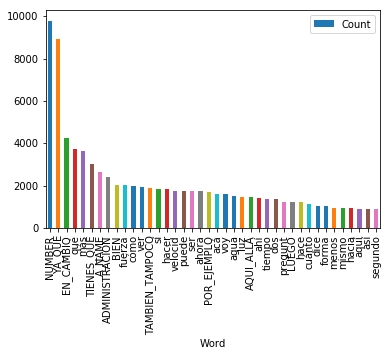

In [51]:
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

#### Unfrequent words

In [514]:
for word,count in wordcount.items():
    if count==1:
        print(word)

spiderm
nadien
rabanal
isaia
áridos
scola
penalme
devenid
nómade
pendrai
kent
coleret
gastars
oceano
viesen
adentré
foca
dominiq
desarre
fluirá
tiren
torcier
hectogr
sismólo
pubis
formemo
aguarda
cueráma
sumemos
hambrun
encharq
numeral
tóMAL
gastará
villela
bosteza
hera
suga
balacea
temblan
alabe
asquero
dork
chispa
momia
reporte
asistid
reporta
larroyo
mantení
búscalo
unif
impacie
kagaku
costas
summone
hundían
embajad
cásense
quemarm
relax
dieces
semiesf
batiero
empujé
evaporá
yamir
disgreg
encuént
lada
goteand
hermani
exhala
mantend
viciado
permíte
pégale
mantent
pinte
gohan
curidad
celcio
lacre
hoc
tallo
montado
how
anótale
dedícat
anótalo
óseas
breguen
escépti
sede
vibren
pérame
siberia
shaolin
obsolet
sinopsi
danfor
antivir
sucesor
fomenta
humito
gerado
fis
fit
neelsen
masglo
baste
terrés
nananan
sextos
remitos
parcero
aviento
satelit
ecuator
bebas
silver
chocado
estornu
quierda
restó
volcanc
velar
abordab
petrolo
minacio
resul
panchit
allan
sacarme
contant
hablás
musicla
recepci


coser
viuda
citolog
mordida
prism
nocebo
tejana
moly
viéndos
subsist
saltado
afectó
récord
test
riéndos
moresa
forzamo
suminis
conín
aprieto
reduzco
pelears
subraya
pócima
mandil
patina
tatami
concepc
equipos
million
viéndol
bordand
camp
escuadr
mallea
aclare
óxidos
tavares
brown
quítame
sujete
anillos
brownie
módem
alumnas
cartíla
educan
bebeto
parrici
situand
problam
problab
mirena
faltarl
faltaro
bioelem
eliza
piedril
manejad
derivad
massiel
muerza
estatus
abrazan
lisado
derivan
chicano
andina
gasita
subcuer
chango
bombo
derivar
changa
géiser
temita
faltará
embarró
celando
metafís
tocada
pony
vacilad
inanici
helicia
angelo
arrugan
demorem
megamen
relatan
cobalto
fénico
diplodo
demores
bloqueo
arrugas
remonta
anuncie
graphic
crepé
ficado
segurol
cau
cah
duchar
panchos
cenapre
réflex
bynum
sps
tazo
dejabas
biograf
espina
hidrato
ofrecie
recenta
freezer
ofrecis
ligar
ligas
tiacaqu
ternura
remontó
one
anunció
bandina
diva
rechaza
sandías
reventó
gallard
motocic
escalan
voce
michel
table

pórtens
juani
apodan
ayudarm
melba
desagua
balanci
amuleto
meramen
it
io
ig
tururur
rascand
arrojen
despiad
sagesse
innovad
marce
dielect
capinte
cavitac
warder
atrapar
aplasta
forzars
humanam
kik
desmenu
mobbing
larissa
membril
lefa
congreg
simient
mufla
avianca
énfasis
nicolas
inca
disuelv
queje
gomas
boston
melaza
meato
afluenc
aportac
aéreo
chorro
opi
agobiar
nudo
bro
sorete
heredit
syncol
trató
plica
insta
nómades
madaria
maxis
exosfer
mírese
tartas
collado
bolt
alargam
modelar
marifer
quemada
momific
analist
doria
lundin
modelan
teselad
bisturí
best-se
réplica
encabez
cantia
rodado
cantil
recordá
viajen
madruga
ágata
areta
ábreme
ford
bere
sagas
mirado
andás
prudant
geoelec
nítidam
privile
tucson
lacuerd
frenará
zara
afectab
mariele
mariela
gratame
stanfor
cachay
encantó
abrazó
digitan
digitac
déjamel
voltaic
daban
sordera
escultu
gancia
obras
acate
forment
viandas
atorado
cerón
pollada
madison
telefon
fijaba
rezago
lauro
inerte
rogarte
inflexi
tubre
cazón
prof
join
linaca
did
di

demográ
ravigal
córrele
guido
simuló
cónsul
diam
cifrar
agitand
loquito
agrónom
paseaba
patema
curia
milgram
curio
inspira
tejidos
itatí
milán
enumera
ivette
quitarí
oca
occ
mascota
tí
lleven
peleada
bandida
disipan
soltado
tabien
encargó
colas
estadou
pololo
ficohsa
urrea
corrupc
frenarl
maletas
nue
sivamen
mus
loventi
fingen
fijos
grecas
mue
alcanos
quitars
agrupen
retiram
gestion
araya
boss
mazda
obligue
improvi
esferas
aulago
plazca
protect
terrena
unicel
tubería
papomud
yarsel
esenari
tututu
agotan
desvane
gametos
telefér
vende-s
ndolo
sáenz
clip
lazaren
zapador
divaza
apagué
xxx
coraza
nopal
miradas
curie
depa
belvede
antílop
isoda
tabo
peratur
maye
milonga
brote
exhibic
recorte
lanzarl
pulga
geólogo
portar
pick
bolonia
barbiqu
portan
silvina
alarme
sulliva
gilda
maduros
copias
antepas
pensilv
escapé
condori
stent
noviazg
sumergí
aluvión
dinamis
donas
desenro
apagaba
ledón
ninjas
casella
yaria
frontal
separó
separé
egaita
digimon
llenaré
próstat
gerente
tiago
acab
corrist
guess
s

#### Con stopwords

In [87]:
# Print most common word
n_print = 40
word_counter = Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print word + ": " + str(count)

que: 21812
la: 21795
de: 17491
el: 12846
a: 11802
es: 9164
y: 9115
no: 8995
se: 8533
lo: 7836
en: 7552
por: 5822
un: 5618
una: 4978
si: 4184
ya: 4109
porque: 3930
va: 3761
está: 3700
con: 3625
los: 3504
qué: 3406
pero: 3360
o: 3270
eso: 3016
más: 2981
para: 2902
entonces: 2820
del: 2615
como: 2460
las: 2375
yo: 2229
le: 2223
cuando: 2141
me: 2021
tiene: 1969
fuerza: 1944
al: 1939
te: 1799
hay: 1732


### Get topic model

In [52]:
import glob, os
import gensim
from gensim import corpora
from collections import Counter

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [54]:
num_topics_array = np.arange(30,200,40)
n_lines_by_document = [2,4,8,20]

In [55]:
docs_lda = clean_texts

In [56]:
dictionary = corpora.Dictionary(docs_lda)

In [70]:
with open(os.path.join(pickle_path,'dictionary.pickle'),'wb') as f:
    pickle.dump(dictionary,f)    

In [57]:
len(dictionary.values())

8867

In [59]:
len(all_corpus_clean)

318022

In [63]:
def print_topic_model(a_model,num_topico,dicc):
    dict_topic = {}
    d_id2token = dicc.id2token
    names = []
    for i in range(num_topico):
        dict_topic['topic %d'%(i+1)+'_words'] = []
        dict_topic['topic %d'%(i+1)+'_belonging'] = []
        names.append('topic %d'%(i+1)+'_words')
        names.append('topic %d'%(i+1)+'_belonging')
        topic = a_model.get_topic_terms(i, topn=20)
        T = [(d_id2token[x],y) for (x,y) in topic]
        for t in T:
            (a,b) = t
            dict_topic['topic %d'%(i+1)+'_words'].append('%10s'%a)
            dict_topic['topic %d'%(i+1)+'_belonging'].append('%.4f'%b)
    return dict_topic,names

### Various topic modelling

In [66]:
n_lines_by_document[1:]

[4, 8, 20]

In [67]:
for n_lines in n_lines_by_document[1:]:
    clean_texts_pairs = []
    for element in grouped(clean_texts, n_lines):
        aux = []
        for x in element:
            aux += x
        clean_texts_pairs.append(aux)
    for num_topics in num_topics_array:
        docs_lda = clean_texts_pairs
        doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs_lda]
        Lda = gensim.models.ldamulticore.LdaMulticore
        ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, workers=3,passes=100)
        dict_topic,names = print_topic_model(ldamodel,num_topics,dictionary)
        a_name = 'dict_topic_'+str(n_lines*15)+'s_'+str(num_topics)+'.pickle'
        with open(os.path.join('pickle_topic_models',a_name),'wb') as f:
            pickle.dump(dict_topic,f)
            pickle.dump(ldamodel,f)
        a_name = 'topic_excel_'+str(n_lines*15)+'s_'+str(num_topics)+'.csv'
        pd.DataFrame(dict_topic)[names].to_csv(os.path.join('topic_models',a_name),encoding='utf-8')   
        print('finished n_topics: '+str(num_topics)+' s: '+str(n_lines*15))

finished n_topics: 30 s: 60
finished n_topics: 70 s: 60
finished n_topics: 110 s: 60
finished n_topics: 150 s: 60
finished n_topics: 190 s: 60
finished n_topics: 30 s: 120
finished n_topics: 70 s: 120
finished n_topics: 110 s: 120
finished n_topics: 150 s: 120
finished n_topics: 190 s: 120
finished n_topics: 30 s: 300
finished n_topics: 70 s: 300
finished n_topics: 110 s: 300
finished n_topics: 150 s: 300
finished n_topics: 190 s: 300


In [68]:
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [69]:
print("Recuerda guardar la información del diccionario")

Recuerda guardar la información del diccionario


### Individual topic modelling

In [500]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs_lda]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=100)

In [515]:
dict_topic = {}
d_id2token = dictionary.id2token
names = []
    for i in range(num_topics):
    print('topic %d'%(i+1))
    dict_topic['topic %d'%(i+1)+'_words'] = []
    dict_topic['topic %d'%(i+1)+'_belonging'] = []
    names.append('topic %d'%(i+1)+'_words')
    names.append('topic %d'%(i+1)+'_belonging')
    topic = ldamodel.get_topic_terms(i, topn=20)
    T = [(d_id2token[x],y) for (x,y) in topic]
    for t in T:
        (a,b) = t
        print('%10s   %.4f'%(a,b))
        dict_topic['topic %d'%(i+1)+'_words'].append('%10s'%a)
        dict_topic['topic %d'%(i+1)+'_belonging'].append('%.4f'%b)
    print(' ')
    

topic 1
    quiero   0.5705
    varios   0.0966
   computa   0.0684
    divide   0.0628
   viviend   0.0241
      puso   0.0222
TIENES_QUE   0.0145
   termóme   0.0138
     sacan   0.0117
    triste   0.0108
    YA_QUE   0.0063
     óxido   0.0058
    estaca   0.0049
      cata   0.0035
    dávila   0.0028
    karina   0.0024
   formalm   0.0024
   estiman   0.0020
     katia   0.0004
   evaporá   0.0000
 
topic 2
   conside   0.3349
    simple   0.1760
     logró   0.0471
   terminé   0.0448
    partió   0.0394
 EN_CAMBIO   0.0288
     curvo   0.0261
   flechit   0.0218
      haré   0.0209
     super   0.0161
   celeste   0.0144
   sumamos   0.0098
   franjas   0.0082
    mesero   0.0062
    steven   0.0041
     veían   0.0027
   olvidab   0.0024
   finland   0.0011
    añitos   0.0011
   deloitt   0.0011
 
topic 3
    prueba   0.4556
    cuerda   0.1824
    afecta   0.0962
   proyecc   0.0664
   propaga   0.0570
    YA_QUE   0.0165
   olvidan   0.0080
   alabanz   0.0047
    brujas  

    recién   0.1778
   quieren   0.1433
   hiciero   0.1365
   cálculo   0.1040
      roja   0.0990
    rápida   0.0672
   póngale   0.0251
 EN_CAMBIO   0.0232
   anotaro   0.0150
   anotado   0.0141
TIENES_QUE   0.0131
   lastima   0.0100
   galante   0.0010
     tapas   0.0000
   chinita   0.0000
       iva   0.0000
   adaptán   0.0000
   ecuator   0.0000
   supéral   0.0000
   evaporá   0.0000
 
topic 23
  ES_DECIR   0.5643
    puedes   0.1216
    cuáles   0.1118
     listo   0.0816
   mercado   0.0122
   transcu   0.0081
   pensado   0.0077
     talla   0.0069
      acto   0.0050
   moleste   0.0036
    telcel   0.0030
   sienten   0.0027
   explíca   0.0023
   sonaron   0.0011
   alfiles   0.0009
    cifrar   0.0004
    ezeiza   0.0004
    jirafa   0.0000
   chinita   0.0000
     tapas   0.0000
 
topic 24
   aumenta   0.3552
   disminu   0.2097
   mientra   0.1253
     pongo   0.0790
   tendría   0.0634
     entra   0.0494
    planta   0.0421
       qué   0.0094
 EN_CAMBIO   0.006

   superfi   0.2263
       uso   0.2103
   longitu   0.1240
     ondas   0.1068
      onda   0.1031
     tomen   0.0282
       qué   0.0251
      dato   0.0234
    planos   0.0218
   accione   0.0149
 EN_CAMBIO   0.0128
    viajan   0.0081
    agarra   0.0074
TIENES_QUE   0.0048
    YA_QUE   0.0036
   subirse   0.0035
   estimar   0.0032
   habilit   0.0024
   paracai   0.0013
   walmart   0.0012
 
topic 46
   podemos   0.3459
      pasó   0.2989
   general   0.1788
   fórmula   0.0587
    equipo   0.0178
   seguimo   0.0155
    ubican   0.0036
   parámet   0.0005
   ecuator   0.0000
     tapas   0.0000
   evaporá   0.0000
     alaba   0.0000
       iva   0.0000
   adaptán   0.0000
    jirafa   0.0000
    mísero   0.0000
   tatiana   0.0000
   ombligo   0.0000
   chinita   0.0000
   costart   0.0000
 
topic 47
   diciend   0.1960
      toma   0.1043
     libre   0.0936
   perpend   0.0929
   comenza   0.0806
     signo   0.0604
   sedació   0.0549
   gallina   0.0492
   prepara   0.036

     lleva   0.2817
    cargas   0.2419
   guardar   0.0741
   repelen   0.0439
     masas   0.0393
     veloz   0.0303
      tras   0.0290
    atraen   0.0283
    separa   0.0263
   compare   0.0208
   muchísi   0.0097
   conquis   0.0063
 EN_CAMBIO   0.0035
   silbido   0.0010
   encantó   0.0010
   supéral   0.0000
   senabil   0.0000
   costart   0.0000
   atiende   0.0000
     ático   0.0000
 
topic 68
       ser   0.5205
     dónde   0.1716
      debe   0.1512
    YA_QUE   0.0742
TIENES_QUE   0.0311
   dijimos   0.0128
    fíjate   0.0099
      salí   0.0037
   esquina   0.0036
   regando   0.0008
    brusco   0.0000
       iva   0.0000
   ecuator   0.0000
    jirafa   0.0000
     tapas   0.0000
   evaporá   0.0000
     alaba   0.0000
   atiende   0.0000
   adaptán   0.0000
   supéral   0.0000
 
topic 69
   rapidez   0.2120
      tiro   0.1672
   centíme   0.1438
    última   0.1403
   unidade   0.0713
    blanco   0.0658
   ponerle   0.0272
      pide   0.0251
     polvo   0.016

      hago   0.2401
    sombra   0.0853
         h   0.0798
    gramos   0.0688
     chico   0.0520
   youtube   0.0506
   resorte   0.0430
     estés   0.0423
      bola   0.0361
   alejand   0.0351
      daba   0.0277
    signos   0.0233
      mapa   0.0171
   captura   0.0171
   naranjo   0.0129
    podían   0.0104
TIENES_QUE   0.0091
      rica   0.0071
   lintern   0.0067
   quintos   0.0057
 
topic 92
    llegar   0.6516
       par   0.0588
    sentir   0.0308
      vaca   0.0272
TIENES_QUE   0.0260
    evento   0.0221
   trabaje   0.0191
   context   0.0186
   atraído   0.0128
    acaban   0.0062
     anses   0.0060
   pastele   0.0044
   avanzam   0.0023
   evaporá   0.0000
     alaba   0.0000
       iva   0.0000
    brusco   0.0000
   adaptán   0.0000
   supéral   0.0000
   ecuator   0.0000
 
topic 93
   continu   0.2400
   partícu   0.2163
   dependi   0.2019
   círculo   0.0750
     zonas   0.0518
   describ   0.0511
   manejan   0.0296
    YA_QUE   0.0229
   formale   0.003

   distanc   0.3840
    centro   0.1507
    altura   0.1415
   recorri   0.0702
    YA_QUE   0.0489
   recorre   0.0416
    máxima   0.0410
     calle   0.0335
     fecha   0.0260
    apunta   0.0055
      mina   0.0053
   creació   0.0039
    hígado   0.0036
      puja   0.0025
   repelan   0.0010
   satanás   0.0005
       ets   0.0005
   campant   0.0005
      pisó   0.0002
   atiende   0.0000
 
topic 115
TAMBIEN_TAMPOCO   0.7385
   palabra   0.0991
 EN_CAMBIO   0.0691
   chiquit   0.0196
TIENES_QUE   0.0175
   hiciste   0.0134
       qué   0.0077
     torno   0.0034
   indique   0.0033
       iva   0.0000
   adaptán   0.0000
   ecuator   0.0000
    brusco   0.0000
   evaporá   0.0000
     alaba   0.0000
   chinita   0.0000
    jirafa   0.0000
   atiende   0.0000
     tapas   0.0000
   tatiana   0.0000
 
topic 116
      aire   0.5261
     vimos   0.1843
    YA_QUE   0.0950
     viaja   0.0604
    mueven   0.0364
   perturb   0.0138
     rabia   0.0111
   calabaz   0.0015
       iva 

   necesit   0.3242
      vaya   0.2594
     decía   0.1491
 EN_CAMBIO   0.0620
      vean   0.0345
    segura   0.0218
   sentars   0.0207
   predicc   0.0148
     envié   0.0108
    húmedo   0.0107
   mejoran   0.0098
     lucha   0.0081
    llanos   0.0041
   revisen   0.0020
   adaptán   0.0000
   ecuator   0.0000
   supéral   0.0000
    brusco   0.0000
       iva   0.0000
    jirafa   0.0000
 
topic 138
       qué   0.2684
       tan   0.2260
      mira   0.2202
    YA_QUE   0.0520
 EN_CAMBIO   0.0483
     estén   0.0392
   complej   0.0305
    oscura   0.0166
    vienen   0.0161
    exacto   0.0160
     pasta   0.0071
TIENES_QUE   0.0028
   seriaci   0.0007
    veloci   0.0003
    lassar   0.0003
    verbos   0.0003
     ático   0.0000
      kika   0.0000
   adaptán   0.0000
   supéral   0.0000
 
topic 139
    viendo   0.3928
     mundo   0.1830
       río   0.0778
   vivimos   0.0454
 EN_CAMBIO   0.0438
    tantos   0.0254
    YA_QUE   0.0220
   querían   0.0164
     mande   0.0

     tabla   0.2162
     miren   0.1652
    clases   0.0817
   posibil   0.0813
TIENES_QUE   0.0728
   directo   0.0649
     ideal   0.0568
    pamela   0.0300
    volvió   0.0242
   graband   0.0158
   cientos   0.0154
    adulto   0.0104
    selfie   0.0052
    azteca   0.0029
    YA_QUE   0.0022
   carioti   0.0020
     parta   0.0009
    zárate   0.0009
     gerda   0.0009
   supéral   0.0000
 
topic 162
   persona   0.5590
   termina   0.1983
    YA_QUE   0.0446
 EN_CAMBIO   0.0345
   dividir   0.0288
       tía   0.0285
     micro   0.0179
   ultraso   0.0154
   infraso   0.0098
TIENES_QUE   0.0096
    frenar   0.0053
   semáfor   0.0041
     dobla   0.0012
   evaporá   0.0000
    brusco   0.0000
     ático   0.0000
   supéral   0.0000
     tapas   0.0000
   atiende   0.0000
   pronost   0.0000
 
topic 163
   princip   0.3818
   transmi   0.1429
       qué   0.0664
     vista   0.0516
    serían   0.0436
   decisió   0.0262
      celu   0.0262
     sonda   0.0235
   calidad   0.0

    misión   0.0267
     suman   0.0252
   cayendo   0.0236
      gato   0.0215
   conocid   0.0207
     pesar   0.0118
     puros   0.0067
   helados   0.0059
   secreta   0.0042
     salva   0.0041
    YA_QUE   0.0020
      mane   0.0008
     trolo   0.0003
   supéral   0.0000
       iva   0.0000
   chinita   0.0000
   evaporá   0.0000
   adaptán   0.0000
     tapas   0.0000
 
topic 183
    podría   0.2684
    página   0.1165
     libro   0.1101
     sirve   0.1013
   grandes   0.0595
   dijeron   0.0483
       qué   0.0444
    YA_QUE   0.0428
   vendien   0.0270
     harto   0.0226
      lisa   0.0206
     gallo   0.0199
 EN_CAMBIO   0.0197
   oracion   0.0078
    regalo   0.0063
      club   0.0054
   ocupand   0.0046
    quitan   0.0037
      logo   0.0028
   flashea   0.0004
 
topic 184
   refleja   0.1678
   permite   0.1274
    existe   0.1128
    último   0.0943
       veo   0.0872
    fuente   0.0617
    llegan   0.0546
   ninguna   0.0515
   sonidos   0.0512
       qué   0.0

In [206]:
pd.DataFrame(dict_topic)[names]

<module 'topic_preprocessing' from 'topic_preprocessing.py'>

In [ ]:
dict_topic = {}
d_id2token = dictionary.id2token
for i in range(num_topics):
    print('topic %d'%(i+1))
    dict_topic['topic %d'%(i+1)] = {'words':[],'belonging':[]}
    topic = ldamodel.get_topic_terms(i, topn=20)
    T = [(d_id2token[x],y) for (x,y) in topic]
    for t in T:
        (a,b) = t
        print('%10s   %.4f'%(a,b))
        dict_topic['topic %d'%(i+1)]['words'].append('%10s'%a)
        dict_topic['topic %d'%(i+1)]['belonging'].append('%.4f'%b)
    print(' ')

In [ ]:
topic = ldamodel.get_term_topics(word_id)